In [1]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
import datetime
import lightgbm as lgb
from scipy import stats
from scipy.sparse import hstack, csr_matrix
from sklearn.model_selection import train_test_split, KFold
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler
stop = set(stopwords.words('english'))
import os
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import xgboost as xgb
import lightgbm as lgb
from sklearn import model_selection
from sklearn.metrics import accuracy_score
import json
import ast
import eli5
import shap
from catboost import CatBoostRegressor
from urllib.request import urlopen
from PIL import Image
from sklearn.preprocessing import LabelEncoder
import time
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import SparsePCA, TruncatedSVD, LatentDirichletAllocation, NMF
from scipy.stats import skew
import cv2
from tqdm import tqdm, tqdm_notebook
from urllib.request import urlopen
from skimage import io

pd.set_option('display.max_columns', 500)


In [2]:
train = pd.read_csv('C:/Users/divya/Downloads/tmdb-box-office-prediction/train.csv')
test = pd.read_csv('C:/Users/divya/Downloads/tmdb-box-office-prediction/test.csv')

In [3]:
print( "updated train dataset:", train.shape,"\n","updated test dataset: ",test.shape)

updated train dataset: (3000, 23) 
 updated test dataset:  (4398, 22)


In [4]:
train.loc[train['id'] == 16,'revenue'] = 192864          # Skinning
train.loc[train['id'] == 90,'budget'] = 30000000         # Sommersby          
train.loc[train['id'] == 118,'budget'] = 60000000        # Wild Hogs
train.loc[train['id'] == 149,'budget'] = 18000000        # Beethoven
train.loc[train['id'] == 313,'revenue'] = 12000000       # The Cookout 
train.loc[train['id'] == 451,'revenue'] = 12000000       # Chasing Liberty
train.loc[train['id'] == 464,'budget'] = 20000000        # Parenthood
train.loc[train['id'] == 470,'budget'] = 13000000        # The Karate Kid, Part II
train.loc[train['id'] == 513,'budget'] = 930000          # From Prada to Nada
train.loc[train['id'] == 797,'budget'] = 8000000         # Welcome to Dongmakgol
train.loc[train['id'] == 819,'budget'] = 90000000        # Alvin and the Chipmunks: The Road Chip
train.loc[train['id'] == 850,'budget'] = 90000000        # Modern Times
train.loc[train['id'] == 1007,'budget'] = 2              # Zyzzyx Road 
train.loc[train['id'] == 1112,'budget'] = 7500000        # An Officer and a Gentleman
train.loc[train['id'] == 1131,'budget'] = 4300000        # Smokey and the Bandit   
train.loc[train['id'] == 1359,'budget'] = 10000000       # Stir Crazy 
train.loc[train['id'] == 1542,'budget'] = 1              # All at Once
train.loc[train['id'] == 1570,'budget'] = 15800000       # Crocodile Dundee II
train.loc[train['id'] == 1571,'budget'] = 4000000        # Lady and the Tramp
train.loc[train['id'] == 1714,'budget'] = 46000000       # The Recruit
train.loc[train['id'] == 1721,'budget'] = 17500000       # Cocoon
train.loc[train['id'] == 1865,'revenue'] = 25000000      # Scooby-Doo 2: Monsters Unleashed
train.loc[train['id'] == 1885,'budget'] = 12             # In the Cut
train.loc[train['id'] == 2091,'budget'] = 10             # Deadfall
train.loc[train['id'] == 2268,'budget'] = 17500000       # Madea Goes to Jail budget
train.loc[train['id'] == 2491,'budget'] = 6              # Never Talk to Strangers
train.loc[train['id'] == 2602,'budget'] = 31000000       # Mr. Holland's Opus
train.loc[train['id'] == 2612,'budget'] = 15000000       # Field of Dreams
train.loc[train['id'] == 2696,'budget'] = 10000000       # Nurse 3-D
train.loc[train['id'] == 2801,'budget'] = 10000000       # Fracture
train.loc[train['id'] == 335,'budget'] = 2 
train.loc[train['id'] == 348,'budget'] = 12
train.loc[train['id'] == 470,'budget'] = 13000000 
train.loc[train['id'] == 513,'budget'] = 1100000
train.loc[train['id'] == 640,'budget'] = 6 
train.loc[train['id'] == 696,'budget'] = 1
train.loc[train['id'] == 797,'budget'] = 8000000 
train.loc[train['id'] == 850,'budget'] = 1500000
train.loc[train['id'] == 1199,'budget'] = 5 
train.loc[train['id'] == 1282,'budget'] = 9               # Death at a Funeral
train.loc[train['id'] == 1347,'budget'] = 1
train.loc[train['id'] == 1755,'budget'] = 2
train.loc[train['id'] == 1801,'budget'] = 5
train.loc[train['id'] == 1918,'budget'] = 592 
train.loc[train['id'] == 2033,'budget'] = 4
train.loc[train['id'] == 2118,'budget'] = 344 
train.loc[train['id'] == 2252,'budget'] = 130
train.loc[train['id'] == 2256,'budget'] = 1 
train.loc[train['id'] == 2696,'budget'] = 10000000




#Clean Data
test.loc[test['id'] == 6733,'budget'] = 5000000
test.loc[test['id'] == 3889,'budget'] = 15000000
test.loc[test['id'] == 6683,'budget'] = 50000000
test.loc[test['id'] == 5704,'budget'] = 4300000
test.loc[test['id'] == 6109,'budget'] = 281756
test.loc[test['id'] == 7242,'budget'] = 10000000
test.loc[test['id'] == 7021,'budget'] = 17540562       #  Two Is a Family
test.loc[test['id'] == 5591,'budget'] = 4000000        # The Orphanage
test.loc[test['id'] == 4282,'budget'] = 20000000       # Big Top Pee-wee
test.loc[test['id'] == 3033,'budget'] = 250 
test.loc[test['id'] == 3051,'budget'] = 50
test.loc[test['id'] == 3084,'budget'] = 337
test.loc[test['id'] == 3224,'budget'] = 4  
test.loc[test['id'] == 3594,'budget'] = 25  
test.loc[test['id'] == 3619,'budget'] = 500  
test.loc[test['id'] == 3831,'budget'] = 3  
test.loc[test['id'] == 3935,'budget'] = 500  
test.loc[test['id'] == 4049,'budget'] = 995946 
test.loc[test['id'] == 4424,'budget'] = 3  
test.loc[test['id'] == 4460,'budget'] = 8  
test.loc[test['id'] == 4555,'budget'] = 1200000 
test.loc[test['id'] == 4624,'budget'] = 30 
test.loc[test['id'] == 4645,'budget'] = 500 
test.loc[test['id'] == 4709,'budget'] = 450 
test.loc[test['id'] == 4839,'budget'] = 7
test.loc[test['id'] == 3125,'budget'] = 25 
test.loc[test['id'] == 3142,'budget'] = 1
test.loc[test['id'] == 3201,'budget'] = 450
test.loc[test['id'] == 3222,'budget'] = 6
test.loc[test['id'] == 3545,'budget'] = 38
test.loc[test['id'] == 3670,'budget'] = 18
test.loc[test['id'] == 3792,'budget'] = 19
test.loc[test['id'] == 3881,'budget'] = 7
test.loc[test['id'] == 3969,'budget'] = 400
test.loc[test['id'] == 4196,'budget'] = 6
test.loc[test['id'] == 4221,'budget'] = 11
test.loc[test['id'] == 4222,'budget'] = 500
test.loc[test['id'] == 4285,'budget'] = 11
test.loc[test['id'] == 4319,'budget'] = 1
test.loc[test['id'] == 4639,'budget'] = 10
test.loc[test['id'] == 4719,'budget'] = 45
test.loc[test['id'] == 4822,'budget'] = 22
test.loc[test['id'] == 4829,'budget'] = 20
test.loc[test['id'] == 4969,'budget'] = 20
test.loc[test['id'] == 5021,'budget'] = 40 
test.loc[test['id'] == 5035,'budget'] = 1 
test.loc[test['id'] == 5063,'budget'] = 14 
test.loc[test['id'] == 5119,'budget'] = 2 
test.loc[test['id'] == 5214,'budget'] = 30 
test.loc[test['id'] == 5221,'budget'] = 50 
test.loc[test['id'] == 4903,'budget'] = 15
test.loc[test['id'] == 4983,'budget'] = 3
test.loc[test['id'] == 5102,'budget'] = 28
test.loc[test['id'] == 5217,'budget'] = 75
test.loc[test['id'] == 5224,'budget'] = 3 
test.loc[test['id'] == 5469,'budget'] = 20 
test.loc[test['id'] == 5840,'budget'] = 1 
test.loc[test['id'] == 5960,'budget'] = 30
test.loc[test['id'] == 6506,'budget'] = 11 
test.loc[test['id'] == 6553,'budget'] = 280
test.loc[test['id'] == 6561,'budget'] = 7
test.loc[test['id'] == 6582,'budget'] = 218
test.loc[test['id'] == 6638,'budget'] = 5
test.loc[test['id'] == 6749,'budget'] = 8 
test.loc[test['id'] == 6759,'budget'] = 50 
test.loc[test['id'] == 6856,'budget'] = 10
test.loc[test['id'] == 6858,'budget'] =  100
test.loc[test['id'] == 6876,'budget'] =  250
test.loc[test['id'] == 6972,'budget'] = 1
test.loc[test['id'] == 7079,'budget'] = 8000000
test.loc[test['id'] == 7150,'budget'] = 118
test.loc[test['id'] == 6506,'budget'] = 118
test.loc[test['id'] == 7225,'budget'] = 6
test.loc[test['id'] == 7231,'budget'] = 85
test.loc[test['id'] == 5222,'budget'] = 5
test.loc[test['id'] == 5322,'budget'] = 90
test.loc[test['id'] == 5350,'budget'] = 70
test.loc[test['id'] == 5378,'budget'] = 10
test.loc[test['id'] == 5545,'budget'] = 80
test.loc[test['id'] == 5810,'budget'] = 8
test.loc[test['id'] == 5926,'budget'] = 300
test.loc[test['id'] == 5927,'budget'] = 4
test.loc[test['id'] == 5986,'budget'] = 1
test.loc[test['id'] == 6053,'budget'] = 20
test.loc[test['id'] == 6104,'budget'] = 1
test.loc[test['id'] == 6130,'budget'] = 30
test.loc[test['id'] == 6301,'budget'] = 150
test.loc[test['id'] == 6276,'budget'] = 100
test.loc[test['id'] == 6473,'budget'] = 100
test.loc[test['id'] == 6842,'budget'] = 30

In [5]:
release_info = pd.read_csv('C:/Users/divya/Downloads/tmdb-box-office-prediction/release_dates_per_country.csv')
release_info['id'] = range(1,7399)
release_info.drop(['original_title','title', 'release_year'],axis = 1,inplace = True)

In [6]:
train = pd.merge(train, release_info, how='left', on=['id'])
test = pd.merge(test, release_info, how='left', on=['id'])

In [7]:
train.shape, test.shape

((3000, 65), (4398, 64))

In [8]:
# features from https://www.kaggle.com/kamalchhirang/eda-simple-feature-engineering-external-data
train = pd.merge(train, pd.read_csv('C:/Users/divya/Downloads/tmdb-box-office-prediction/tmdb-competition-additional-features/TrainAdditionalFeatures.csv'), how='left', on=['imdb_id'])
test = pd.merge(test, pd.read_csv('C:/Users/divya/Downloads/tmdb-box-office-prediction/tmdb-competition-additional-features/TestAdditionalFeatures.csv'), how='left', on=['imdb_id'])

In [9]:
test['revenue'] = np.nan

In [10]:
train.shape, test.shape

((3000, 68), (4398, 68))

In [11]:
additionalTrainData = pd.read_csv('C:/Users/divya/Downloads/tmdb-box-office-prediction/tmdb-box-office-prediction-more-training-data/additionalTrainData.csv')
additionalTrainData['release_date'] = additionalTrainData['release_date'].astype('str')
additionalTrainData['release_date'] = additionalTrainData['release_date'].str.replace('-', '/')
additionalTrainData['release_date'] = pd.to_datetime(additionalTrainData['release_date'], format='%d/%m/%Y').dt.strftime('%m/%d/%Y')
train = pd.concat([train, additionalTrainData])

C:\Users\divya\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [12]:
print( "updated train dataset:", train.shape,"\n","updated test dataset: ",test.shape)

updated train dataset: (5001, 68) 
 updated test dataset:  (4398, 68)


In [13]:
train = train.drop(['rating','totalVotes','popularity2'], axis=1)
test = test.drop(['rating','totalVotes','popularity2'], axis=1)

In [14]:
title_rating = pd.read_csv('C:/Users/divya/Downloads/tmdb-box-office-prediction/data.tsv', sep='\t') 
title_rating = title_rating.rename(columns={"tconst": "imdb_id"})

In [15]:
train = pd.merge(train, title_rating, how='left', on=['imdb_id'])
test = pd.merge(test, title_rating, how='left', on=['imdb_id'])

In [16]:
print( "updated train dataset:", train.shape,"\n","updated test dataset: ",test.shape)

updated train dataset: (5001, 67) 
 updated test dataset:  (4398, 67)


In [17]:
train_df = train.copy()
img_size = 256
batch_size = 16
print(train_df.shape)

(5001, 67)


In [18]:
train_df[~(train_df['poster_path'].isnull() | train_df['imdb_id'].isnull())].shape

(2999, 67)

In [ ]:
imdb_ids = train_df[~(train_df['poster_path'].isnull() | train_df['imdb_id'].isnull())].imdb_id.values
n_batches = len(imdb_ids) // batch_size + 1
n_batches

In [ ]:
from keras.applications.densenet import preprocess_input, DenseNet121
def resize_to_square(im):
    old_size = im.shape[:2] # old_size is in (height, width) format
    ratio = float(img_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])
    # new_size should be in (width, height) format
    im = cv2.resize(im, (new_size[1], new_size[0]))
    delta_w = img_size - new_size[1]
    delta_h = img_size - new_size[0]
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)
    color = [0, 0, 0]
    new_im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT,value=color)
    return new_im

def load_image(path, pet_id):
    resp = (urlopen(path + pet_id))
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    new_image = resize_to_square(image)
    new_image = preprocess_input(new_image)
    return new_image

In [ ]:
from keras.models import Model
from keras.layers import GlobalAveragePooling2D, Input, Lambda, AveragePooling1D
import keras.backend as K
inp = Input((256,256,3))
backbone = DenseNet121(input_tensor = inp, 
                       #weights = "C:/Users/divya/Downloads/PetFinder/densenet-keras/DenseNet-BC-121-32-no-top.h5",
                       include_top = False)
x = backbone.output
x = GlobalAveragePooling2D()(x)
x = Lambda(lambda x: K.expand_dims(x,axis = -1))(x)
x = AveragePooling1D(4)(x)
out = Lambda(lambda x: x[:,:,0])(x)

m = Model(inp,out)

In [ ]:
path = "https://image.tmdb.org/t/p/w600_and_h900_bestv2/"

features = {}
    
for b in tqdm_notebook(range(n_batches)):
    start = b*batch_size
    end = (b+1)*batch_size
    batch_pets = imdb_ids[start:end]
    batch_images = np.zeros((len(batch_pets),img_size,img_size,3))
    for i,pet_id in enumerate(batch_pets):
        #print(pet_id)
        x = train_df[train_df['imdb_id']==pet_id].poster_path.to_string().split('/')[1]
        try:
            batch_images[i] = load_image(path , x)
        except:
            pass
        #print('first')
    batch_preds = m.predict(batch_images) 
    for i,pet_id in enumerate(batch_pets):
        features[pet_id] = batch_preds[i]

In [ ]:
train_feats = pd.DataFrame.from_dict(features, orient='index')
train_feats.to_csv('train_img_features.csv')

In [ ]:
test_df = test.copy()
imdb_ids = test_df[~test_df['poster_path'].isnull()].imdb_id.values
n_batches = len(imdb_ids) // batch_size + 1
print(n_batches)

In [ ]:
path = "https://image.tmdb.org/t/p/w600_and_h900_bestv2/"

features = {}
    
for b in tqdm_notebook(range(n_batches)):
    start = b*batch_size
    end = (b+1)*batch_size
    batch_pets = imdb_ids[start:end]
    batch_images = np.zeros((len(batch_pets),img_size,img_size,3))
    for i,pet_id in enumerate(batch_pets):
        x = test_df[test_df['imdb_id']==pet_id].poster_path.to_string().split('/')[1]
        try:
            batch_images[i] = load_image(path , x)
        except:
            pass
    batch_preds = m.predict(batch_images) 
    for i,pet_id in enumerate(batch_pets):
        features[pet_id] = batch_preds[i]

In [ ]:
test_feats = pd.DataFrame.from_dict(features, orient='index')
test_feats.to_csv('test_img_features.csv')

In [17]:
train_feats = pd.read_csv('C:/Users/divya/Downloads/tmdb-box-office-prediction/train_img_features.csv')
test_feats = pd.read_csv('C:/Users/divya/Downloads/tmdb-box-office-prediction/test_img_features.csv')
train_feats = train_feats.add_prefix('img_')
test_feats = test_feats.add_prefix('img_')
train_feats = train_feats.rename({'img_Unnamed: 0':'imdb_id'},axis=1)
test_feats = test_feats.rename({'img_Unnamed: 0':'imdb_id'},axis=1)
x_train = train_feats.iloc[:,2:]
x_test = test_feats.iloc[:,2:]

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
tr_pca = pca.fit_transform(x_train)
train_pca = pd.DataFrame(data = tr_pca,  columns = ['pc1', 'pc2',  'pc3'])
train_pca = pd.concat([train_pca, train_feats[['imdb_id']]], axis = 1)

ts_pca = pca.fit_transform(x_test)
test_pca = pd.DataFrame(data = ts_pca,  columns = ['pc1', 'pc2',  'pc3'])
test_pca = pd.concat([test_pca, test_feats[['imdb_id']]], axis = 1)

In [19]:
train = pd.merge(train, train_pca , how='left', on=['imdb_id'])
test = pd.merge(test, test_pca , how='left', on=['imdb_id'])

In [20]:
print( "updated train dataset:", train.shape,"\n","updated test dataset: ",test.shape)

updated train dataset: (5001, 70) 
 updated test dataset:  (4398, 70)


In [21]:
train_feats = pd.read_csv('C:/Users/divya/Downloads/tmdb-box-office-prediction/train_img_statistics.csv')
test_feats = pd.read_csv('C:/Users/divya/Downloads/tmdb-box-office-prediction/test_img_statistics.csv')

In [22]:
train_feats = train_feats.drop(['Unnamed: 0','image','dullness_whiteness','temp_size','width','height'],axis=1)
test_feats = test_feats.drop(['Unnamed: 0','image','dullness_whiteness','temp_size','width','height'],axis=1)
train_feats.shape

(2999, 6)

In [23]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
train_feats["dullness"] = scaler.fit_transform(train_feats[["dullness"]])
train_feats["whiteness"] = scaler.fit_transform(train_feats[["whiteness"]])
train_feats["average_pixel_width"] = scaler.fit_transform(train_feats[["average_pixel_width"]])
train_feats["image_size"] = scaler.fit_transform(train_feats[["image_size"]])
train_feats["blurrness"] = scaler.fit_transform(train_feats[["blurrness"]])


test_feats["dullness"] = scaler.fit_transform(test_feats[["dullness"]])
test_feats["whiteness"] = scaler.fit_transform(test_feats[["whiteness"]])
test_feats["average_pixel_width"] = scaler.fit_transform(test_feats[["average_pixel_width"]])
test_feats["image_size"] = scaler.fit_transform(test_feats[["image_size"]])
test_feats["blurrness"] = scaler.fit_transform(test_feats[["blurrness"]])

C:\Users\divya\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by MinMaxScaler.

C:\Users\divya\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by MinMaxScaler.



In [24]:
train_feats.head(4)

,imdb_id,dullness,whiteness,average_pixel_width,image_size,blurrness
0,tt2637294,0.057763,0.310410,0.522687,0.322380,0.113120
1,tt0368933,0.029786,0.180421,0.332645,0.349478,0.121304
2,tt2582802,0.657391,0.006721,0.153515,0.060589,0.029019
3,tt1821480,0.071174,0.000000,0.365685,0.312742,0.049289


In [25]:
aggs = {
    'dullness': ['sum', 'mean'],
    'whiteness': ['sum', 'mean'],
    'average_pixel_width': ['sum', 'mean'],
    'image_size': ['sum', 'mean'],
    'blurrness': ['sum', 'mean']
}

agg_train_imgs = train_feats.groupby('imdb_id').agg(aggs)
new_columns = [k + '_' + agg for k in aggs.keys() for agg in aggs[k]]
agg_train_imgs.columns = new_columns
agg_train_imgs = agg_train_imgs.reset_index()

agg_test_imgs = test_feats.groupby('imdb_id').agg(aggs)
new_columns = [k + '_' + agg for k in aggs.keys() for agg in aggs[k]]
agg_test_imgs.columns = new_columns
agg_test_imgs = agg_test_imgs.reset_index()

agg_imgs = pd.concat([agg_train_imgs, agg_test_imgs], axis=0).reset_index(drop=True)

In [26]:
x_train = agg_train_imgs.iloc[:,2:]
x_test = agg_test_imgs.iloc[:,2:]

pca = PCA(n_components=3)
tr_pca = pca.fit_transform(x_train)
train_pca = pd.DataFrame(data = tr_pca,  columns = ['pc_img1', 'pc_img2',  'pc_img3'])
train_pca = pd.concat([train_pca, train_feats[['imdb_id']]], axis = 1)

ts_pca = pca.fit_transform(x_test)
test_pca = pd.DataFrame(data = ts_pca,  columns = ['pc_img1', 'pc_img2',  'pc_img3'])
test_pca = pd.concat([test_pca, test_feats[['imdb_id']]], axis = 1)

In [27]:
train = pd.merge(train, train_pca , how='left', on=['imdb_id'])
test = pd.merge(test, test_pca , how='left', on=['imdb_id'])

In [28]:
print( "updated train dataset:", train.shape,"\n","updated test dataset: ",test.shape)

updated train dataset: (5001, 73) 
 updated test dataset:  (4398, 73)


In [29]:
train.head(4)

,AR,AT,AU,BE,BG,CA,CL,CZ,DE,DK,FI,FR,GB,GR,HK,HU,ID,IE,IL,IS,IT,KW,KZ,Keywords,LV,MX,NL,NO,PE,PL,PT,RU,SE,SI,SK,TH,TR,TW,UA,US,belongs_to_collection,budget,cast,crew,genres,homepage,id,imdb_id,movie_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,theatrical,theatrical_limited,title,averageRating,numVotes,pc1,pc2,pc3,pc_img1,pc_img2,pc_img3
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...","[{'id': 35, 'name': 'Comedy'}]",NaN,1.0,tt2637294,243938.0,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,12314651,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,6.0,0.0,Hot Tub Time Machine 2,5.1,34524.0,0.084922,-0.002546,-0.482154,-0.018693,-0.331148,0.087864
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,2.0,tt0368933,11130.0,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,95149435,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,10.0,0.0,The Princess Diaries 2: Royal Engagement,5.8,67922.0,0.741074,0.843500,-0.448911,0.007400,-0.293329,-0.009933
2,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...",0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,NaN,3300000,"[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...","[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,3.0,tt2582802,244786.0,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,13092000,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,37.0,1.0,Whiplash,8.5,620462.0,2.069717,0.124205,0.981838,0.123350,-0.163928,-0.059693
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1200000,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...","[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,4.0,tt1821480,82825.0,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,16000000,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,3.0,0.0,Kahaani,8.1,52064.0,0.685157,0.300819,0.353134,0.002681,-0.317821,-0.124545


In [30]:
# from this kernel: https://www.kaggle.com/gravix/gradient-in-a-box
dict_columns = ['belongs_to_collection', 'genres', 'production_companies',
                'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']

def text_to_dict(df):
    for column in dict_columns:
        df[column] = df[column].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x) )
    return df
        
train = text_to_dict(train)
test = text_to_dict(test)

In [31]:
train['collection_name'] = train['belongs_to_collection'].apply(lambda x: x[0]['name'] if x != {} else 0)
train['has_collection'] = train['belongs_to_collection'].apply(lambda x: len(x) if x != {} else 0)

test['collection_name'] = test['belongs_to_collection'].apply(lambda x: x[0]['name'] if x != {} else 0)
test['has_collection'] = test['belongs_to_collection'].apply(lambda x: len(x) if x != {} else 0)

train = train.drop(['belongs_to_collection'], axis=1)
test = test.drop(['belongs_to_collection'], axis=1)

In [32]:
list_of_genres = list(train['genres'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)

train['num_genres'] = train['genres'].apply(lambda x: len(x) if x != {} else 0)
train['all_genres'] = train['genres'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
top_genres = [m[0] for m in Counter([i for j in list_of_genres for i in j]).most_common(15)]
for g in top_genres:
    train['genre_' + g] = train['all_genres'].apply(lambda x: 1 if g in x else 0)
    
test['num_genres'] = test['genres'].apply(lambda x: len(x) if x != {} else 0)
test['all_genres'] = test['genres'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
for g in top_genres:
    test['genre_' + g] = test['all_genres'].apply(lambda x: 1 if g in x else 0)

train = train.drop(['genres'], axis=1)
test = test.drop(['genres'], axis=1)

In [33]:
list_of_companies = list(train['production_companies'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)

train['num_companies'] = train['production_companies'].apply(lambda x: len(x) if x != {} else 0)
train['all_production_companies'] = train['production_companies'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
top_companies = [m[0] for m in Counter([i for j in list_of_companies for i in j]).most_common(30)]
for g in top_companies:
    train['production_company_' + g] = train['all_production_companies'].apply(lambda x: 1 if g in x else 0)
    
test['num_companies'] = test['production_companies'].apply(lambda x: len(x) if x != {} else 0)
test['all_production_companies'] = test['production_companies'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
for g in top_companies:
    test['production_company_' + g] = test['all_production_companies'].apply(lambda x: 1 if g in x else 0)

train = train.drop(['production_companies'], axis=1)
test = test.drop(['production_companies'], axis=1)

In [34]:
list_of_countries = list(train['production_countries'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)

train['num_countries'] = train['production_countries'].apply(lambda x: len(x) if x != {} else 0)
train['all_countries'] = train['production_countries'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
top_countries = [m[0] for m in Counter([i for j in list_of_countries for i in j]).most_common(25)]
for g in top_countries:
    train['production_country_' + g] = train['all_countries'].apply(lambda x: 1 if g in x else 0)
    
test['num_countries'] = test['production_countries'].apply(lambda x: len(x) if x != {} else 0)
test['all_countries'] = test['production_countries'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
for g in top_countries:
    test['production_country_' + g] = test['all_countries'].apply(lambda x: 1 if g in x else 0)

train = train.drop(['production_countries'], axis=1)
test = test.drop(['production_countries'], axis=1)

In [35]:
list_of_languages = list(train['spoken_languages'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)

train['num_languages'] = train['spoken_languages'].apply(lambda x: len(x) if x != {} else 0)
train['all_languages'] = train['spoken_languages'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
top_languages = [m[0] for m in Counter([i for j in list_of_languages for i in j]).most_common(30)]
for g in top_languages:
    train['language_' + g] = train['all_languages'].apply(lambda x: 1 if g in x else 0)
    
test['num_languages'] = test['spoken_languages'].apply(lambda x: len(x) if x != {} else 0)
test['all_languages'] = test['spoken_languages'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
for g in top_languages:
    test['language_' + g] = test['all_languages'].apply(lambda x: 1 if g in x else 0)

train = train.drop(['spoken_languages'], axis=1)
test = test.drop(['spoken_languages'], axis=1)

In [36]:
list_of_keywords = list(train['Keywords'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)

train['num_Keywords'] = train['Keywords'].apply(lambda x: len(x) if x != {} else 0)
train['all_Keywords'] = train['Keywords'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
top_keywords = [m[0] for m in Counter([i for j in list_of_keywords for i in j]).most_common(15)]
for g in top_keywords:
    train['keyword_' + g] = train['all_Keywords'].apply(lambda x: 1 if g in x else 0)
    
test['num_Keywords'] = test['Keywords'].apply(lambda x: len(x) if x != {} else 0)
test['all_Keywords'] = test['Keywords'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
for g in top_keywords:
    test['keyword_' + g] = test['all_Keywords'].apply(lambda x: 1 if g in x else 0)

train = train.drop(['Keywords'], axis=1)
test = test.drop(['Keywords'], axis=1)

In [37]:
list_of_cast_names = list(train['cast'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
list_of_cast_genders = list(train['cast'].apply(lambda x: [i['gender'] for i in x] if x != {} else []).values)
list_of_cast_characters = list(train['cast'].apply(lambda x: [i['character'] for i in x] if x != {} else []).values)

In [38]:
train['num_cast'] = train['cast'].apply(lambda x: len(x) if x != {} else 0)
top_cast_names = [m[0] for m in Counter([i for j in list_of_cast_names for i in j]).most_common(15)]
for g in top_cast_names:
    train['cast_name_' + g] = train['cast'].apply(lambda x: 1 if g in str(x) else 0)
train['all_cast_name'] = train['cast'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '') #new

train['genders_0_cast'] = train['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 0]))
train['genders_1_cast'] = train['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 1]))
train['genders_2_cast'] = train['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 2]))

top_cast_characters = [m[0] for m in Counter([i for j in list_of_cast_characters for i in j]).most_common(15)]
for g in top_cast_characters:
    train['cast_character_' + g] = train['cast'].apply(lambda x: 1 if g in str(x) else 0)
    
test['num_cast'] = test['cast'].apply(lambda x: len(x) if x != {} else 0)
for g in top_cast_names:
    test['cast_name_' + g] = test['cast'].apply(lambda x: 1 if g in str(x) else 0)
test['all_cast_name'] = test['cast'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '') #new

test['genders_0_cast'] = test['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 0]))
test['genders_1_cast'] = test['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 1]))
test['genders_2_cast'] = test['cast'].apply(lambda x: sum([1 for i in x if i['gender'] == 2]))

for g in top_cast_characters:
    test['cast_character_' + g] = test['cast'].apply(lambda x: 1 if g in str(x) else 0)

train = train.drop(['cast'], axis=1)
test = test.drop(['cast'], axis=1)

In [39]:
list_of_crew_names = list(train['crew'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
list_of_crew_jobs = list(train['crew'].apply(lambda x: [i['job'] for i in x] if x != {} else []).values)
list_of_crew_genders = list(train['crew'].apply(lambda x: [i['gender'] for i in x] if x != {} else []).values)
list_of_crew_departments = list(train['crew'].apply(lambda x: [i['department'] for i in x] if x != {} else []).values)

In [40]:
train['num_crew'] = train['crew'].apply(lambda x: len(x) if x != {} else 0)
top_crew_names = [m[0] for m in Counter([i for j in list_of_crew_names for i in j]).most_common(15)]

for g in top_crew_names:
    train['crew_name_' + g] = train['crew'].apply(lambda x: 1 if g in str(x) else 0)
train['all_crew_name'] = train['crew'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '') #new

train['genders_0_crew'] = train['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 0]))
train['genders_1_crew'] = train['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 1]))
train['genders_2_crew'] = train['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 2]))
top_cast_characters = [m[0] for m in Counter([i for j in list_of_cast_characters for i in j]).most_common(15)]
for g in top_cast_characters:
    train['crew_character_' + g] = train['crew'].apply(lambda x: 1 if g in str(x) else 0)

top_crew_jobs = [m[0] for m in Counter([i for j in list_of_crew_jobs for i in j]).most_common(10)]
for j in top_crew_jobs:
    train['jobs_' + j] = train['crew'].apply(lambda x: sum([1 for i in x if i['job'] == j]))
top_crew_departments = [m[0] for m in Counter([i for j in list_of_crew_departments for i in j]).most_common(15)]
for j in top_crew_departments:
    train['departments_' + j] = train['crew'].apply(lambda x: sum([1 for i in x if i['department'] == j])) 
    
test['num_crew'] = test['crew'].apply(lambda x: len(x) if x != {} else 0)
for g in top_crew_names:
    test['crew_name_' + g] = test['crew'].apply(lambda x: 1 if g in str(x) else 0)
test['all_crew_name'] = test['crew'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '') #new
    
test['genders_0_crew'] = test['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 0]))
test['genders_1_crew'] = test['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 1]))
test['genders_2_crew'] = test['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 2]))
for g in top_cast_characters:
    test['crew_character_' + g] = test['crew'].apply(lambda x: 1 if g in str(x) else 0)
for j in top_crew_jobs:
    test['jobs_' + j] = test['crew'].apply(lambda x: sum([1 for i in x if i['job'] == j]))
for j in top_crew_departments:
    test['departments_' + j] = test['crew'].apply(lambda x: sum([1 for i in x if i['department'] == j])) 

train = train.drop(['crew'], axis=1)
test = test.drop(['crew'], axis=1)

In [41]:
dtrain = train.copy()
dtest = test.copy()

In [42]:
train = dtrain.copy()
test = dtest.copy()

In [43]:
train['log_revenue'] = np.log1p(train['revenue']) 

In [44]:
###########################################################################

###### https://www.kaggle.com/ogrellier/python-target-encoding-for-categorical-features

def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series=None,tst_series=None,target=None,min_samples_leaf=1,smoothing=1,noise_level=0):
    """
    Smoothing is computed like in the following paper by Daniele Micci-Barreca
    https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf
    trn_series : training categorical feature as a pd.Series
    tst_series : test categorical feature as a pd.Series
    target : target data as a pd.Series
    min_samples_leaf (int) : minimum samples to take category average into account
    smoothing (int) : smoothing effect to balance categorical average vs prior  
    """ 
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)
    # Compute target mean 
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])
    # Compute smoothing
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
    # Apply average function to all target data
    prior = target.mean()
    # The bigger the count the less full_avg is taken into account
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)
    # Apply averages to trn and tst series
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_trn_series.index = trn_series.index 
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_tst_series.index = tst_series.index
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

In [45]:
trn, sub = target_encode(train["all_genres"], 
                         test["all_genres"], 
                         target=train.log_revenue, 
                         min_samples_leaf=100,
                         smoothing=10,
                         noise_level=0.01)
train['tencode_genres'] = trn
test['tencode_genres'] = sub

In [46]:
del trn, sub

In [47]:
train = train.drop(['log_revenue'], axis=1)
full = pd.concat([train, test]).reset_index(drop = True)

C:\Users\divya\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [48]:
full[['release_month','release_day','release_year']]=full['release_date'].str.split('/',expand=True).replace(np.nan, 0).astype(int)
full['release_year'] = full['release_year']
full.loc[ (full['release_year'] <= 19) & (full['release_year'] < 100), "release_year"] += 2000
full.loc[ (full['release_year'] > 19)  & (full['release_year'] < 100), "release_year"] += 1900
    
releaseDate = pd.to_datetime(full['release_date']) 
full['release_dayofweek'] = releaseDate.dt.dayofweek 
full['release_quarter'] = releaseDate.dt.quarter     

In [49]:
full.shape

(9399, 290)

In [50]:
full['Holiday_month']=0
full.loc[full['release_month'].isin([11,12]),'Holiday_month'] = 1

In [51]:
#rating_na = full.groupby(["release_year","original_language"])['rating'].mean().reset_index()
#rating_na = rating_na.rename(columns={"rating":"mean_year_lang_rating"})
#full = full.merge(rating_na, how = 'left' ,on = ["release_year","original_language"])

#vote_count_na = full.groupby(["release_year","original_language"])['totalVotes'].mean().reset_index()
#vote_count_na = vote_count_na.rename(columns={"totalVotes":"mean_year_lang_votes"})
#full = full.merge(vote_count_na, how = 'left' ,on = ["release_year","original_language"])

#full['weightedRating'] = ( full['mean_year_lang_rating']*full['mean_year_lang_votes'] + 6.367 * 1000 ) / ( full['mean_year_lang_votes'] + 1000 )

In [52]:
full['originalBudget'] = full['budget']
full['inflationBudget'] = full['budget'] + full['budget']*1.8/100*(2018-full['release_year']) #Inflation simple formula
full['budget'] = np.log1p(full['budget']) 

In [53]:
full['#Feature_avg_budget_genres'] = full[['budget', 'all_genres']].groupby(['all_genres'])['budget'].transform('mean')
full['#Feature_avg_budget_prod_comp'] = full[['budget', 'all_production_companies']].groupby(['all_production_companies'])['budget'].transform('mean')
full['#Feature_avg_budget_prod_count'] = full[['budget', 'all_countries']].groupby(['all_countries'])['budget'].transform('mean')
full['#Feature_avg_budget_all_languages'] = full[['budget', 'all_languages']].groupby(['all_languages'])['budget'].transform('mean')
full['#Feature_avg_budget_all_keywords'] = full[['budget', 'all_Keywords']].groupby(['all_Keywords'])['budget'].transform('mean')
#full = full.drop(['all_production_companies','all_countries','all_languages','all_Keywords' ], axis=1)
#full['#Feature_gen_pop']=full[['all_genres', 'release_month','popularity']].groupby(['all_genres','release_month'])['popularity'].transform('count') / full.shape[0]

In [54]:
full['popularity_mean_year'] = full['popularity'] / full.groupby("release_year")["popularity"].transform('mean')
full['budget_runtime_ratio'] = full['budget']/full['runtime'] 
full['budget_popularity_ratio'] = full['budget']/full['popularity']
full['budget_year_ratio'] = full['budget']/(full['release_year']*full['release_year'])
full['releaseYear_popularity_ratio'] = full['release_year']/full['popularity']
full['releaseYear_popularity_ratio2'] = full['popularity']/full['release_year']

#full['popularity_totalVotes_ratio'] = full['mean_year_lang_votes']/full['popularity']
#full['rating_popularity_ratio'] = full['mean_year_lang_rating']/full['popularity']
#full['rating_totalVotes_ratio'] = full['mean_year_lang_votes']/full['mean_year_lang_rating']
#full['totalVotes_releaseYear_ratio'] = full['mean_year_lang_votes']/full['release_year']
#full['budget_rating_ratio'] = full['budget']/full['mean_year_lang_rating']
#full['runtime_rating_ratio'] = full['runtime']/full['mean_year_lang_rating']
#full['budget_totalVotes_ratio'] = full['budget']/full['mean_year_lang_votes']

In [55]:
full['popularity_Votes_ratio'] = full['numVotes']/full['popularity']
full['rating_popularity_ratio'] = full['averageRating']/full['popularity']
full['rating_Votes_ratio'] = full['numVotes']/full['averageRating']
full['Votes_releaseYear_ratio'] = full['numVotes']/full['release_year']
full['budget_rating_ratio'] = full['budget']/full['averageRating']
full['runtime_rating_ratio'] = full['runtime']/full['averageRating']
full['budget_totalVotes_ratio'] = full['budget']/full['numVotes']

In [56]:
full['has_homepage'] = 1
full.loc[pd.isnull(full['homepage']) ,"has_homepage"] = 0
    
full['isTaglineNA'] = 0
full.loc[full['tagline'] == 0 ,"isTaglineNA"] = 1 

full['isOriginalLanguageEng'] = 0 
full.loc[ full['original_language'] == "en" ,"isOriginalLanguageEng"] = 1
    
full['isTitleDifferent'] = 1
full.loc[ full['original_title'] == full['title'] ,"isTitleDifferent"] = 0 

full['isMovieReleased'] = 1
full.loc[ full['status'] != "Released" ,"isMovieReleased"] = 0 

In [57]:
def meta_nlp_feats(df,col):
    
    df[col] = df[col].fillna("None")
    df['length_'+col] = df[col].apply(lambda x : len(x))
    df['capitals_'+col] = df[col].apply(lambda comment: sum(1 for c in comment if c.isupper()))
    df['caps_vs_length_'+col] = df.apply(lambda row: float(row['capitals_'+col])/float(row['length_'+col]),axis=1)
    df['num_exclamation_marks_'+col] = df[col].apply(lambda comment: comment.count('!'))
    df['num_question_marks_'+col] = df[col].apply(lambda comment: comment.count('?'))
    df['num_punctuation_'+col] = df[col].apply(lambda comment: sum(comment.count(w) for w in '.,;:'))
    df['num_symbols_'+col] = df[col].apply(lambda comment: sum(comment.count(w) for w in '*&$%'))
    df['num_words_'+col] = df[col].apply(lambda comment: len(comment.split()))
    df['num_unique_words_'+col] = df[col].apply(lambda comment: len(set(w for w in comment.split())))
    df['words_vs_unique_'+col] = df['num_unique_words_'+col] / df['num_words_'+col]
    #df['num_smilies'] = df[col].apply(lambda comment: sum(comment.count(w) for w in (':-)', ':)', ';-)', ';)')))
    #df['num_sad'] = df[col].apply(lambda comment: sum(comment.count(w) for w in (':-<', ':()', ';-()', ';(')))
    return df

In [58]:
full =  meta_nlp_feats(full, 'overview')
full =  meta_nlp_feats(full, 'original_title')
full =  meta_nlp_feats(full, 'title')
full =  meta_nlp_feats(full, 'tagline')

In [59]:
full['meanruntimeByYear'] = full.groupby("release_year")["runtime"].aggregate('mean')
full['meanPopularityByYear'] = full.groupby("release_year")["popularity"].aggregate('mean')
full['meanBudgetByYear'] = full.groupby("release_year")["budget"].aggregate('mean')
#full['meantotalVotesByYear'] = full.groupby("release_year")["mean_year_lang_votes"].aggregate('mean')
#full['meanTotalVotesByRating'] = full.groupby("mean_year_lang_rating")["mean_year_lang_votes"].aggregate('mean')
full['medianBudgetByYear'] = full.groupby("release_year")["budget"].aggregate('median')

In [60]:
full['meanVotesByYear'] = full.groupby("release_year")["numVotes"].aggregate('mean')
full['meanVotesByRating'] = full.groupby("averageRating")["numVotes"].aggregate('mean')

In [61]:
full['sumruntimeByYear'] = full.groupby("release_year")["runtime"].aggregate('sum')
full['sumPopularityByYear'] = full.groupby("release_year")["popularity"].aggregate('sum')
full['sumBudgetByYear'] = full.groupby("release_year")["budget"].aggregate('sum')
#full['sumtotalVotesByYear'] = full.groupby("release_year")["mean_year_lang_votes"].aggregate('sum')
#full['sumTotalVotesByRating'] = full.groupby("mean_year_lang_rating")["mean_year_lang_votes"].aggregate('sum')

In [62]:
full['sumVotesByYear'] = full.groupby("release_year")["numVotes"].aggregate('sum')
full['sumVotesByRating'] = full.groupby("averageRating")["numVotes"].aggregate('sum')

In [63]:
full['GlobalPopRank'] = full['popularity'].rank(method='max')

In [64]:
full['long_than_avg_runtime']=0
full.loc[(full['runtime']>107),'long_than_avg_runtime']=1

pattern_cast = '|'.join(top_cast_names)
full['cast_name_runtime']=0
full.loc[((full['all_cast_name'].str.contains(pattern_cast))&(full['long_than_avg_runtime']==1)),'cast_name_runtime']=1

In [65]:
full['runtime_hrs']=round(full['runtime']/60, 2)

In [66]:
full['runtime_exact']=0
full.loc[full['runtime_hrs'].isin([1,2,3,4,5]),'runtime_exact']=1

In [67]:
pattern_crew = '|'.join(top_crew_names)
full['high_expect']=0
full.loc[(full['all_cast_name'].str.contains(pattern_cast))&(full['all_crew_name'].str.contains(pattern_crew)),'high_expect']=1

In [68]:
movie_count = full.groupby(['movie_id'])['imdb_id'].count().reset_index()
movie_count.columns = ['movie_id', 'movie_count']
full = full.merge(movie_count, how='left', on='movie_id')

In [69]:
dfull = full.copy()

In [70]:
full.shape

(9399, 374)

In [73]:
full=dfull.copy()

In [71]:
full['popularity_theatrical_ratio'] = full['theatrical']/full['popularity']
full['budget_theatrical_ratio'] = full['budget']/full['theatrical']
full['meantheatricalByYear'] = full.groupby("release_year")["theatrical"].aggregate('mean')

In [72]:
full['popularity_theat_lim_ratio'] = full['theatrical_limited']/full['popularity']
full['budget_theat_lim_ratio'] = full['theatrical_limited']/full['budget']
full['meantheatlimByYear'] = full.groupby("release_year")["theatrical_limited"].aggregate('mean')

In [73]:
full['thearatio']=full['theatrical_limited']/full['theatrical']

In [74]:
def agg_features(df, groupby, agg, prefix):
    agg_df = df.groupby(groupby).agg(agg)
    agg_df.columns = get_new_columns(prefix, agg)
    return agg_df

def get_new_columns(name, aggs):
    return [name + '_' + k + '_' + agg for k in aggs.keys() for agg in aggs[k]]

In [75]:
agg = {}
agg['theatrical'] = ['mean', 'var', 'max', 'min', 'skew', 'median']
agg['theatrical_limited'] = ['mean', 'var', 'max', 'min', 'skew', 'median']
#agg['averageRating'] = ['mean', 'var']
#agg['numVotes'] = ['mean', 'var']

In [76]:
grouby = 'all_genres'
agg_df = agg_features(full, grouby, agg, grouby)
full = full.merge(agg_df, on=grouby, how='left')

agg_kurt_df = full.groupby(grouby)[list(agg.keys())].apply(pd.DataFrame.kurt)
agg_kurt_df.columns = [f"{key}_kurt" for key in list(agg.keys())]
full = full.merge(agg_kurt_df, on=grouby, how='left')

agg_perc_df = full.groupby(grouby)[list(agg.keys())].quantile(.25)
agg_perc_df.columns = [f"{key}_perc_25" for key in list(agg.keys())]
full = full.merge(agg_perc_df, on=grouby, how='left')
    
agg_perc_df = full.groupby(grouby)[list(agg.keys())].quantile(.75)
agg_perc_df.columns = [f"{key}_perc_75" for key in list(agg.keys())]
full = full.merge(agg_perc_df, on=grouby, how='left')

In [77]:
grouby = 'all_countries'
agg_df = agg_features(full, grouby, agg, grouby)
full = full.merge(agg_df, on=grouby, how='left')

agg_kurt_df = full.groupby(grouby)[list(agg.keys())].apply(pd.DataFrame.kurt)
agg_kurt_df.columns = [f"{key}_kurt" for key in list(agg.keys())]
full = full.merge(agg_kurt_df, on=grouby, how='left')

agg_perc_df = full.groupby(grouby)[list(agg.keys())].quantile(.25)
agg_perc_df.columns = [f"{key}_perc_25" for key in list(agg.keys())]
full = full.merge(agg_perc_df, on=grouby, how='left')
    
agg_perc_df = full.groupby(grouby)[list(agg.keys())].quantile(.75)
agg_perc_df.columns = [f"{key}_perc_75" for key in list(agg.keys())]
full = full.merge(agg_perc_df, on=grouby, how='left')

In [78]:
grouby = 'all_languages'
agg_df = agg_features(full, grouby, agg, grouby)
full = full.merge(agg_df, on=grouby, how='left')

agg_kurt_df = full.groupby(grouby)[list(agg.keys())].apply(pd.DataFrame.kurt)
agg_kurt_df.columns = [f"{key}_kurt" for key in list(agg.keys())]
full = full.merge(agg_kurt_df, on=grouby, how='left')

agg_perc_df = full.groupby(grouby)[list(agg.keys())].quantile(.25)
agg_perc_df.columns = [f"{key}_perc_25" for key in list(agg.keys())]
full = full.merge(agg_perc_df, on=grouby, how='left')
    
agg_perc_df = full.groupby(grouby)[list(agg.keys())].quantile(.75)
agg_perc_df.columns = [f"{key}_perc_75" for key in list(agg.keys())]
full = full.merge(agg_perc_df, on=grouby, how='left')

In [79]:
full.head(3)

,AR,AT,AU,BE,BG,CA,CL,CZ,DE,DK,FI,FR,GB,GR,HK,HU,ID,IE,IL,IS,IT,KW,KZ,LV,MX,NL,NO,PE,PL,PT,RU,SE,SI,SK,TH,TR,TW,UA,US,all_Keywords,all_cast_name,all_countries,all_crew_name,all_genres,all_languages,all_production_companies,averageRating,budget,cast_character_,cast_character_Additional Voices (voice),cast_character_Bartender,cast_character_Dancer,cast_character_Debutante,cast_character_Doctor,cast_character_Frank,cast_character_Herself,cast_character_Himself,cast_character_Jack,cast_character_Nurse,cast_character_Paul,cast_character_Reporter,cast_character_Security Guard,cast_character_Waitress,cast_name_Bill Murray,cast_name_Bruce McGill,cast_name_Bruce Willis,cast_name_Forest Whitaker,cast_name_J.K. Simmons,cast_name_John Turturro,cast_name_Liam Neeson,cast_name_Morgan Freeman,cast_name_Nicolas Cage,cast_name_Owen Wilson,cast_name_Robert De Niro,cast_name_Samuel L. Jackson,cast_name_Susan Sarandon,cast_name_Sylvester Stallone,cast_name_Willem Dafoe,collection_name,crew_character_,crew_character_Additional Voices (voice),crew_character_Bartender,crew_character_Dancer,crew_character_Debutante,crew_character_Doctor,crew_character_Frank,crew_character_Herself,crew_character_Himself,crew_character_Jack,crew_character_Nurse,crew_character_Paul,crew_character_Reporter,crew_character_Security Guard,crew_character_Waitress,crew_name_Avy Kaufman,crew_name_Bob Weinstein,crew_name_Deborah Aquila,crew_name_Francine Maisler,crew_name_Harvey Weinstein,crew_name_James Horner,crew_name_James Newton Howard,crew_name_Janet Hirshenson,crew_name_Jerry Goldsmith,crew_name_Kerry Barden,crew_name_Luc Besson,crew_name_Mary Vernieu,crew_name_Robert Rodriguez,crew_name_Steven Spielberg,crew_name_Tricia Wood,departments_Actors,departments_Art,departments_Camera,departments_Costume & Make-Up,departments_Crew,departments_Directing,departments_Editing,departments_Lighting,departments_Production,departments_Sound,departments_Visual Effects,departments_Writing,genders_0_cast,genders_0_crew,genders_1_cast,genders_1_crew,genders_2_cast,genders_2_crew,genre_Action,genre_Adventure,genre_Animation,genre_Comedy,genre_Crime,genre_Drama,genre_Family,genre_Fantasy,genre_History,genre_Horror,genre_Music,genre_Mystery,genre_Romance,genre_Science Fiction,genre_Thriller,has_collection,homepage,id,imdb_id,jobs_Art Direction,jobs_Casting,jobs_Director,jobs_Director of Photography,jobs_Editor,jobs_Executive Producer,jobs_Original Music Composer,jobs_Producer,jobs_Production Design,jobs_Screenplay,keyword_aftercreditsstinger,keyword_based on novel,keyword_biography,keyword_duringcreditsstinger,keyword_dystopia,keyword_friendship,keyword_independent film,keyword_murder,keyword_revenge,keyword_sequel,keyword_sex,keyword_sport,keyword_suspense,keyword_violence,keyword_woman director,language_,language_Dansk,language_Deutsch,language_English,language_Español,language_Français,language_Italiano,language_Latin,language_Magyar,language_Nederlands,language_Polski,language_Português,language_Pусский,language_Română,language_Tiếng Việt,language_Türkçe,language_svenska,language_Český,language_ελληνικά,language_עִבְרִית,language_اردو,language_العربية,language_فارسی,language_हिन्दी,language_தமிழ்,language_ภาษาไทย,language_广州话 / 廣州話,language_日本語,language_普通话,language_한국어/조선말,movie_id,numVotes,num_Keywords,num_cast,num_companies,num_countries,num_crew,num_genres,num_languages,original_language,original_title,overview,pc1,pc2,pc3,pc_img1,pc_img2,pc_img3,popularity,poster_path,production_company_Amblin Entertainment,production_company_BBC Films,production_company_Canal+,production_company_Columbia Pictures,production_company_Columbia Pictures Corporation,production_company_Dimension Films,production_company_DreamWorks SKG,production_company_Dune Entertainment,production_company_Fox 2000 Pictures,production_company_Fox Searchlight Pictures,production_company_Hollywood Pictures,production_company_Lionsgate,production_company_Metro-Goldwyn-Mayer (MGM),production_company_Miramax Films,production

In [80]:
for col in ['original_language', 'collection_name', 'all_genres']:
    le = LabelEncoder()
    le.fit(list(full[col].fillna('')))
    full[col] = le.transform(full[col].fillna('').astype(str))

In [81]:
full.fillna(value=0.0, inplace = True)

In [82]:
#remove rating_x, 
full = full.drop(['homepage', 'imdb_id', 'poster_path', 'release_date', 'status',
                  'original_title', 'tagline', 'title','all_Keywords','all_cast_name',
                  'all_countries','all_crew_name','all_languages','all_production_companies','overview'], axis=1)

In [83]:
for col in full.columns:
    if full[col].nunique() == 1:
        print(col)
        full = full.drop([col], axis=1)

cast_character_
crew_character_
crew_character_Additional Voices (voice)
crew_character_Bartender
crew_character_Dancer
crew_character_Debutante
crew_character_Herself
crew_character_Himself
crew_character_Reporter
crew_character_Security Guard
crew_character_Waitress
language_
isTaglineNA


In [84]:
full.shape

(9399, 407)

In [85]:
full.head(4)

,AR,AT,AU,BE,BG,CA,CL,CZ,DE,DK,FI,FR,GB,GR,HK,HU,ID,IE,IL,IS,IT,KW,KZ,LV,MX,NL,NO,PE,PL,PT,RU,SE,SI,SK,TH,TR,TW,UA,US,all_genres,averageRating,budget,cast_character_Additional Voices (voice),cast_character_Bartender,cast_character_Dancer,cast_character_Debutante,cast_character_Doctor,cast_character_Frank,cast_character_Herself,cast_character_Himself,cast_character_Jack,cast_character_Nurse,cast_character_Paul,cast_character_Reporter,cast_character_Security Guard,cast_character_Waitress,cast_name_Bill Murray,cast_name_Bruce McGill,cast_name_Bruce Willis,cast_name_Forest Whitaker,cast_name_J.K. Simmons,cast_name_John Turturro,cast_name_Liam Neeson,cast_name_Morgan Freeman,cast_name_Nicolas Cage,cast_name_Owen Wilson,cast_name_Robert De Niro,cast_name_Samuel L. Jackson,cast_name_Susan Sarandon,cast_name_Sylvester Stallone,cast_name_Willem Dafoe,collection_name,crew_character_Doctor,crew_character_Frank,crew_character_Jack,crew_character_Nurse,crew_character_Paul,crew_name_Avy Kaufman,crew_name_Bob Weinstein,crew_name_Deborah Aquila,crew_name_Francine Maisler,crew_name_Harvey Weinstein,crew_name_James Horner,crew_name_James Newton Howard,crew_name_Janet Hirshenson,crew_name_Jerry Goldsmith,crew_name_Kerry Barden,crew_name_Luc Besson,crew_name_Mary Vernieu,crew_name_Robert Rodriguez,crew_name_Steven Spielberg,crew_name_Tricia Wood,departments_Actors,departments_Art,departments_Camera,departments_Costume & Make-Up,departments_Crew,departments_Directing,departments_Editing,departments_Lighting,departments_Production,departments_Sound,departments_Visual Effects,departments_Writing,genders_0_cast,genders_0_crew,genders_1_cast,genders_1_crew,genders_2_cast,genders_2_crew,genre_Action,genre_Adventure,genre_Animation,genre_Comedy,genre_Crime,genre_Drama,genre_Family,genre_Fantasy,genre_History,genre_Horror,genre_Music,genre_Mystery,genre_Romance,genre_Science Fiction,genre_Thriller,has_collection,id,jobs_Art Direction,jobs_Casting,jobs_Director,jobs_Director of Photography,jobs_Editor,jobs_Executive Producer,jobs_Original Music Composer,jobs_Producer,jobs_Production Design,jobs_Screenplay,keyword_aftercreditsstinger,keyword_based on novel,keyword_biography,keyword_duringcreditsstinger,keyword_dystopia,keyword_friendship,keyword_independent film,keyword_murder,keyword_revenge,keyword_sequel,keyword_sex,keyword_sport,keyword_suspense,keyword_violence,keyword_woman director,language_Dansk,language_Deutsch,language_English,language_Español,language_Français,language_Italiano,language_Latin,language_Magyar,language_Nederlands,language_Polski,language_Português,language_Pусский,language_Română,language_Tiếng Việt,language_Türkçe,language_svenska,language_Český,language_ελληνικά,language_עִבְרִית,language_اردو,language_العربية,language_فارسی,language_हिन्दी,language_தமிழ்,language_ภาษาไทย,language_广州话 / 廣州話,language_日本語,language_普通话,language_한국어/조선말,movie_id,numVotes,num_Keywords,num_cast,num_companies,num_countries,num_crew,num_genres,num_languages,original_language,pc1,pc2,pc3,pc_img1,pc_img2,pc_img3,popularity,production_company_Amblin Entertainment,production_company_BBC Films,production_company_Canal+,production_company_Columbia Pictures,production_company_Columbia Pictures Corporation,production_company_Dimension Films,production_company_DreamWorks SKG,production_company_Dune Entertainment,production_company_Fox 2000 Pictures,production_company_Fox Searchlight Pictures,production_company_Hollywood Pictures,production_company_Lionsgate,production_company_Metro-Goldwyn-Mayer (MGM),production_company_Miramax Films,production_company_New Line Cinema,production_company_Orion Pictures,production_company_Paramount Pictures,production_company_Regency Enterprises,production_company_Relativity Media,production_company_StudioCanal,production_company_Summit Entertainment,production_company_Touchstone Pictures,production_company_TriStar Pictures,production_company_Twentieth Century Fox Film Corporation,production_company_United Artists,production_compa

In [86]:
train = full.loc[:train.shape[0] - 1,:]
test = full.loc[train.shape[0]:,:] 

In [87]:
train.shape, test.shape

((5001, 407), (4398, 407))

In [88]:
X = train.drop(['id', 'revenue'], axis=1)
y = np.log1p(train['revenue'])
X_test = test.drop(['id','revenue'], axis=1)

In [89]:
X.shape, X_test.shape

((5001, 405), (4398, 405))

In [90]:
n_fold = 5
folds = KFold(n_splits=n_fold, shuffle=True, random_state=42)

In [91]:
def train_model(X, X_test, y, params=None, folds=folds, model_type='lgb', plot_feature_importance=False, model=None):

    oof = np.zeros(X.shape[0])
    prediction = np.zeros(X_test.shape[0])
    scores = []
    feature_importance = pd.DataFrame()
    for fold_n, (train_index, valid_index) in enumerate(folds.split(X)):
        print('Fold', fold_n, 'started at', time.ctime())
        if model_type == 'sklearn':
            X_train, X_valid = X[train_index], X[valid_index]
        else:
            X_train, X_valid = X.values[train_index], X.values[valid_index]
        y_train, y_valid = y[train_index], y[valid_index]
        
        if model_type == 'lgb':
            model = lgb.LGBMRegressor(**params, n_estimators = 20000, nthread = 4, n_jobs = -1)
            model.fit(X_train, y_train, 
                    eval_set=[(X_train, y_train), (X_valid, y_valid)], eval_metric='rmse',
                    verbose=1000, early_stopping_rounds=200)
            
            y_pred_valid = model.predict(X_valid)
            y_pred = model.predict(X_test, num_iteration=model.best_iteration_)
            
        if model_type == 'xgb':
            train_data = xgb.DMatrix(data=X_train, label=y_train)
            valid_data = xgb.DMatrix(data=X_valid, label=y_valid)

            watchlist = [(train_data, 'train'), (valid_data, 'valid_data')]
            model = xgb.train(dtrain=train_data, num_boost_round=20000, evals=watchlist, early_stopping_rounds=200, verbose_eval=500, params=params)
            y_pred_valid = model.predict(xgb.DMatrix(X_valid), ntree_limit=model.best_ntree_limit)
            y_pred = model.predict(xgb.DMatrix(X_test.values), ntree_limit=model.best_ntree_limit)

        if model_type == 'sklearn':
            model = model
            model.fit(X_train, y_train)
            y_pred_valid = model.predict(X_valid).reshape(-1,)
            score = mean_squared_error(y_valid, y_pred_valid)
            
            y_pred = model.predict(X_test)
            
        if model_type == 'cat':
            model = CatBoostRegressor(iterations=20000,  eval_metric='RMSE', **params)
            model.fit(X_train, y_train, eval_set=(X_valid, y_valid), cat_features=[], use_best_model=True, verbose=False)

            y_pred_valid = model.predict(X_valid)
            y_pred = model.predict(X_test)
        
        oof[valid_index] = y_pred_valid.reshape(-1,)
        scores.append(mean_squared_error(y_valid, y_pred_valid) ** 0.5)
        
        prediction += y_pred    
        
        if model_type == 'lgb':
            # feature importance
            fold_importance = pd.DataFrame()
            fold_importance["feature"] = X.columns
            fold_importance["importance"] = model.feature_importances_
            fold_importance["fold"] = fold_n + 1
            feature_importance = pd.concat([feature_importance, fold_importance], axis=0)

    prediction /= n_fold
    
    print('CV mean score: {0:.4f}, std: {1:.4f}.'.format(np.mean(scores), np.std(scores)))
    
    if model_type == 'lgb':
        feature_importance["importance"] /= n_fold
        if plot_feature_importance:
            cols = feature_importance[["feature", "importance"]].groupby("feature").mean().sort_values(
                by="importance", ascending=False)[:50].index

            best_features = feature_importance.loc[feature_importance.feature.isin(cols)]

            plt.figure(figsize=(16, 12));
            sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False));
            plt.title('LGB Features (avg over folds)');
        
            return oof, prediction, feature_importance
        return oof, prediction
    
    else:
        return oof, prediction

Fold 0 started at Wed Jul 17 11:06:11 2019
Training until validation scores don't improve for 200 rounds.
[1000]	valid_0's rmse: 1.55413	valid_1's rmse: 2.20756
Early stopping, best iteration is:
[1235]	valid_0's rmse: 1.46171	valid_1's rmse: 2.20597
Fold 1 started at Wed Jul 17 11:06:18 2019
Training until validation scores don't improve for 200 rounds.
[1000]	valid_0's rmse: 1.54852	valid_1's rmse: 2.20148
Early stopping, best iteration is:
[994]	valid_0's rmse: 1.55066	valid_1's rmse: 2.20113
Fold 2 started at Wed Jul 17 11:06:24 2019
Training until validation scores don't improve for 200 rounds.
[1000]	valid_0's rmse: 1.53088	valid_1's rmse: 2.26972
Early stopping, best iteration is:
[885]	valid_0's rmse: 1.57969	valid_1's rmse: 2.26711
Fold 3 started at Wed Jul 17 11:06:30 2019
Training until validation scores don't improve for 200 rounds.
[1000]	valid_0's rmse: 1.5413	valid_1's rmse: 2.30575
Early stopping, best iteration is:
[1294]	valid_0's rmse: 1.42602	valid_1's rmse: 2.30194

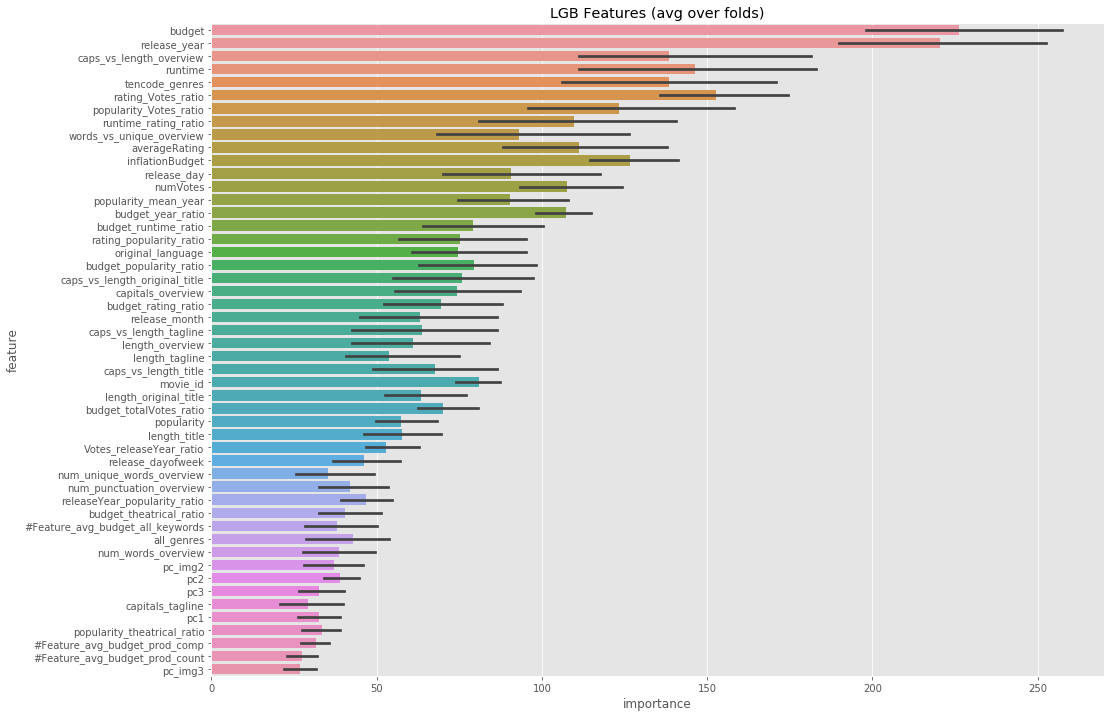

In [92]:
params = {'num_leaves': 30,
         'min_data_in_leaf': 10,
         'objective': 'regression',
         'max_depth': 5,
         'learning_rate': 0.01,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.2,
         "verbosity": -1}
oof_lgb, prediction_lgb, _ = train_model(X, X_test, y, params=params, model_type='lgb', plot_feature_importance=True)

In [93]:
sub = pd.read_csv('C:/Users/divya/Downloads/tmdb-box-office-prediction/sample_submission.csv')
sub['revenue'] = np.expm1(prediction_lgb)
sub.to_csv("lgb.csv", index=False)

In [94]:
xgb_params = {'eta': 0.01,
              'objective': 'reg:linear',
              'max_depth': 7,
              'subsample': 0.8,
              'colsample_bytree': 0.8,
              'eval_metric': 'rmse',
              'seed': 11,
              'silent': True}
oof_xgb, prediction_xgb = train_model(X, X_test, y, params=xgb_params, model_type='xgb', plot_feature_importance=False)

Fold 0 started at Wed Jul 17 11:06:52 2019
[0]	train-rmse:14.685	valid_data-rmse:14.5824
Multiple eval metrics have been passed: 'valid_data-rmse' will be used for early stopping.

Will train until valid_data-rmse hasn't improved in 200 rounds.
[500]	train-rmse:1.28786	valid_data-rmse:2.22898
[1000]	train-rmse:0.895213	valid_data-rmse:2.20331
[1500]	train-rmse:0.621522	valid_data-rmse:2.19925
Stopping. Best iteration:
[1456]	train-rmse:0.642358	valid_data-rmse:2.19879

Fold 1 started at Wed Jul 17 11:07:44 2019
[0]	train-rmse:14.6433	valid_data-rmse:14.7505
Multiple eval metrics have been passed: 'valid_data-rmse' will be used for early stopping.

Will train until valid_data-rmse hasn't improved in 200 rounds.
[500]	train-rmse:1.27506	valid_data-rmse:2.21019
Stopping. Best iteration:
[780]	train-rmse:1.03374	valid_data-rmse:2.19895

Fold 2 started at Wed Jul 17 11:08:14 2019
[0]	train-rmse:14.6763	valid_data-rmse:14.6199
Multiple eval metrics have been passed: 'valid_data-rmse' will be

In [95]:
sub = pd.read_csv('C:/Users/divya/Downloads/tmdb-box-office-prediction/sample_submission.csv')
sub['revenue'] = np.expm1(prediction_xgb)
sub.to_csv("xgb.csv", index=False)

In [100]:
cat_params = {'learning_rate': 0.002,
              'depth': 5,
              'l2_leaf_reg': 10,
              # 'bootstrap_type': 'Bernoulli',
              'colsample_bylevel': 0.8,
              'bagging_temperature': 0.2,
              #'metric_period': 500,
              'od_type': 'Iter',
              'od_wait': 100,
              'random_seed': 11,
              'allow_writing_files': False}
oof_cat, prediction_cat = train_model(X, X_test, y, params=cat_params, model_type='cat')

Fold 0 started at Wed Jul 17 11:10:52 2019
Fold 1 started at Wed Jul 17 11:29:17 2019
Fold 2 started at Wed Jul 17 11:54:14 2019
Fold 3 started at Wed Jul 17 12:36:52 2019
Fold 4 started at Wed Jul 17 12:49:46 2019
CV mean score: 2.2008, std: 0.0665.


In [101]:
sub = pd.read_csv('C:/Users/divya/Downloads/tmdb-box-office-prediction/sample_submission.csv')
sub['revenue'] = np.expm1(prediction_cat)
sub.to_csv("cat.csv", index=False)

In [96]:
params = {'num_leaves': 30,
         'min_data_in_leaf': 20,
         'objective': 'regression',
         'max_depth': 5,
         'learning_rate': 0.01,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.2,
         "verbosity": -1}
oof_lgb_1, prediction_lgb_1 = train_model(X, X_test, y, params=params, model_type='lgb', plot_feature_importance=False)

Fold 0 started at Wed Jul 17 11:10:05 2019
Training until validation scores don't improve for 200 rounds.
[1000]	valid_0's rmse: 1.61785	valid_1's rmse: 2.20391
Early stopping, best iteration is:
[985]	valid_0's rmse: 1.62362	valid_1's rmse: 2.20324
Fold 1 started at Wed Jul 17 11:10:11 2019
Training until validation scores don't improve for 200 rounds.
[1000]	valid_0's rmse: 1.62499	valid_1's rmse: 2.19904
Early stopping, best iteration is:
[1034]	valid_0's rmse: 1.61432	valid_1's rmse: 2.19847
Fold 2 started at Wed Jul 17 11:10:17 2019
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[740]	valid_0's rmse: 1.71426	valid_1's rmse: 2.27162
Fold 3 started at Wed Jul 17 11:10:22 2019
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[733]	valid_0's rmse: 1.70791	valid_1's rmse: 2.2891
Fold 4 started at Wed Jul 17 11:10:27 2019
Training until validation scores don't improve for 200 rounds.
[100

In [97]:
sub = pd.read_csv('C:/Users/divya/Downloads/tmdb-box-office-prediction/sample_submission.csv')
sub['revenue'] = np.expm1(prediction_lgb_1)
sub.to_csv("lgb_1.csv", index=False)

In [98]:
params = {'num_leaves': 30,
         'min_data_in_leaf': 20,
         'objective': 'regression',
         'max_depth': 7,
         'learning_rate': 0.02,
         "boosting": "gbdt",
         "feature_fraction": 0.7,
         "bagging_freq": 5,
         "bagging_fraction": 0.7,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.2,
         "verbosity": -1}
oof_lgb_2, prediction_lgb_2 = train_model(X, X_test, y, params=params, model_type='lgb', plot_feature_importance=False)

Fold 0 started at Wed Jul 17 11:10:34 2019
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[416]	valid_0's rmse: 1.46108	valid_1's rmse: 2.2114
Fold 1 started at Wed Jul 17 11:10:38 2019
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[292]	valid_0's rmse: 1.62374	valid_1's rmse: 2.19355
Fold 2 started at Wed Jul 17 11:10:41 2019
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[248]	valid_0's rmse: 1.67636	valid_1's rmse: 2.28881
Fold 3 started at Wed Jul 17 11:10:44 2019
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[515]	valid_0's rmse: 1.35045	valid_1's rmse: 2.3021
Fold 4 started at Wed Jul 17 11:10:49 2019
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[291]	valid_0's rmse: 1.64247	valid_1's rmse: 2.08076
CV mean score: 2.2153, std:

In [99]:
sub = pd.read_csv('C:/Users/divya/Downloads/tmdb-box-office-prediction/sample_submission.csv')
sub['revenue'] = np.expm1(prediction_lgb_2)
sub.to_csv("lgb_2.csv", index=False)

In [102]:
train_stack = np.vstack([oof_lgb, oof_xgb, oof_cat, oof_lgb_1, oof_lgb_2]).transpose()
train_stack = pd.DataFrame(train_stack, columns=['lgb', 'xgb', 'cat', 'lgb_1', 'lgb_2'])
test_stack = np.vstack([prediction_lgb, prediction_xgb, prediction_cat, prediction_lgb_1, prediction_lgb_2]).transpose()
test_stack = pd.DataFrame(test_stack, columns=['lgb', 'xgb', 'cat', 'lgb_1', 'lgb_2'])

Fold 0 started at Wed Jul 17 13:07:34 2019
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[406]	valid_0's rmse: 2.13776	valid_1's rmse: 2.21215
Fold 1 started at Wed Jul 17 13:07:34 2019
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[525]	valid_0's rmse: 2.13489	valid_1's rmse: 2.18518
Fold 2 started at Wed Jul 17 13:07:35 2019
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[479]	valid_0's rmse: 2.12704	valid_1's rmse: 2.23122
Fold 3 started at Wed Jul 17 13:07:35 2019
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[607]	valid_0's rmse: 2.11774	valid_1's rmse: 2.27616
Fold 4 started at Wed Jul 17 13:07:35 2019
Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[549]	valid_0's rmse: 2.15853	valid_1's rmse: 2.07782
CV mean score: 2.1965, st

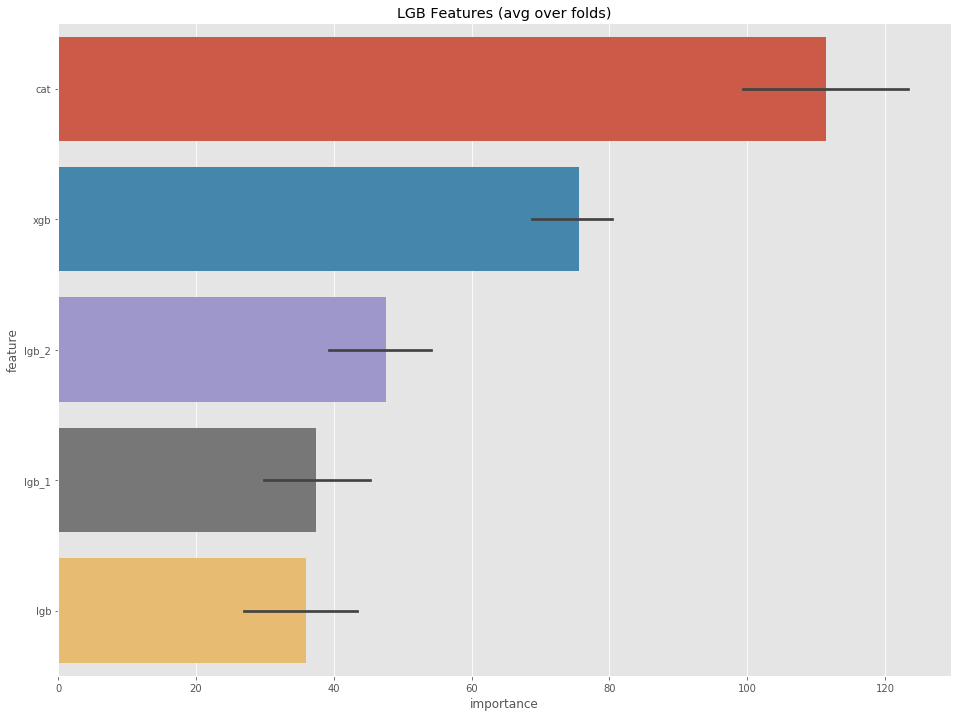

In [103]:
params = {'num_leaves': 8,
         'min_data_in_leaf': 20,
         'objective': 'regression',
         'max_depth': 2,
         'learning_rate': 0.01,
         "boosting": "gbdt",
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.2,
         "verbosity": -1}
oof_lgb_stack, prediction_lgb_stack, _ = train_model(train_stack, test_stack, y, params=params, model_type='lgb', plot_feature_importance=True)

In [104]:
sub = pd.read_csv('C:/Users/divya/Downloads/tmdb-box-office-prediction/sample_submission.csv')
sub['revenue'] = np.expm1(prediction_lgb_stack)
sub.to_csv("lgb_stack.csv", index=False)

In [105]:
model = linear_model.RidgeCV(alphas=(0.01, 0.1, 1.0, 10.0, 100.0), scoring='neg_mean_squared_error', cv=folds)
oof_rcv_stack, prediction_rcv_stack = train_model(train_stack.values, test_stack.values, y, params=None, model_type='sklearn', model=model)

Fold 0 started at Wed Jul 17 13:07:36 2019
Fold 1 started at Wed Jul 17 13:07:36 2019
Fold 2 started at Wed Jul 17 13:07:36 2019
Fold 3 started at Wed Jul 17 13:07:37 2019
Fold 4 started at Wed Jul 17 13:07:37 2019
CV mean score: 2.1874, std: 0.0693.


In [106]:
sub = pd.read_csv('C:/Users/divya/Downloads/tmdb-box-office-prediction/sample_submission.csv')
sub['revenue'] = np.expm1(prediction_rcv_stack)
sub.to_csv("rcv_stack.csv", index=False)

In [107]:
sub['revenue'] = np.expm1((prediction_lgb + prediction_xgb) / 2)
sub.to_csv("blend_lgb_xgb.csv", index=False)

sub['revenue'] = np.expm1((prediction_lgb + prediction_xgb + prediction_cat) / 3)
sub.to_csv("blend_lgb_xgb_cat.csv", index=False)
sub['revenue'] = np.expm1((prediction_lgb + prediction_xgb + prediction_cat + prediction_lgb_1) / 4)
sub.to_csv("blend_lgb_xgb_cat_lgb1.csv", index=False)
sub['revenue'] = np.expm1((prediction_lgb + prediction_xgb + prediction_cat + prediction_lgb_1 + prediction_lgb_2) / 5)
sub.to_csv("blend_lgb_xgb_cat_lgb1_lgb2.csv", index=False)
